y = (beta1)x + beta0 is the same as
y = beta0 * x^0 + beta1 * x ^ 1

inner multiply and keep the outsides for matrix regression

Cannot divide matrices, so you have to take the inverse of multiplication
y = x + beta (to solve for x in matrix)
(x transpose * y) = (x transpose * x)beta
(x transpose * x) inverse * x transpose y = (x transpose * x) inverse * (x transpose x) * beta (right side cancels out except for beta)
(x transpose * x) inverse * x transpose y = beta

First column has to be 1s attached to xs(length)
y = width

# Part 1

Imports the necessary modules

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2 

Reads in iris and removes iris- from species, then outputs head to verify 


In [24]:
data = pd.read_csv('iris.txt')
data['Species'] = data['Species'].str.replace("Iris-", '').str.capitalize()
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Step 3
Creates a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns (1 point)

In [32]:
new_data = data.iloc[:,2:4]
new_data

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


# Step 4

Creates a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies.

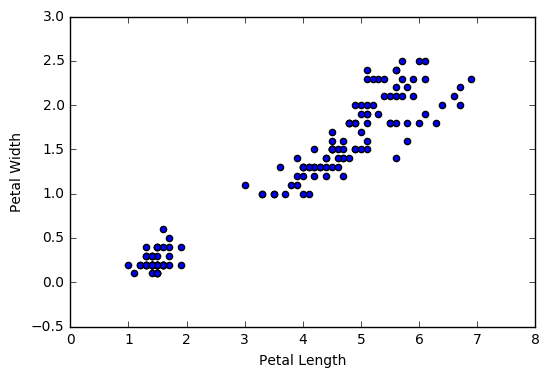

In [65]:
x,y = new_data[['PetalLength']], new_data[['PetalWidth']]
plt.scatter(x, y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Step 5
Create a function to calculate the coefficients of a least squares approximation 

In [80]:
beta = inverse(x.transpose * X) * x.transpose * y

NameError: name 'inverse' is not defined